In [1]:
import re
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# Sample false positives load from txt file where separated by newline
with open("../output/false_positives.txt", "r") as file:
    false_positives = file.read().splitlines()
false_positives

['egad00001008484',
 'egas00001005950',
 'gse275822',
 'bmrb 52262',
 '8c0v',
 'emd-16372',
 'emd-16373',
 '8c0w',
 'empiar-11671',
 'ers5673303',
 'ers5673307',
 'ers5673304',
 'ers5673293',
 'ers5673305',
 'ers5673294',
 'ers5673309',
 'ers5673311',
 'ers5673296',
 'ers5673291',
 'ers5673299',
 'ers5673308',
 'ers5673290',
 'ers5673302',
 'ers5673306',
 'ers5673297',
 'ers5673298',
 'ers5673295',
 'ers5673292',
 'ers5673310',
 'ers5673301',
 'prjeb42777',
 'ers5673300',
 'prjna854331',
 's-bsst1095',
 'emd-16841',
 'pxd038751',
 'e-mtab-12064',
 'cp026536',
 'egas00001004064',
 'prjeb41042',
 'erp124768',
 'pdb: 6wjq',
 'pass01587',
 'prjna548782',
 'e-mtab-9090',
 'e-mtab-7985',
 'e-mtab-7067',
 'gse131377',
 'e-mtab-4828',
 'pxd016701',
 'e-mtab-7997',
 's-bsst254',
 'e-mtab-8019',
 'e-mtab-8021',
 'gse125203',
 'mtbls794',
 'prjna485513',
 'srp126753',
 'srp136301',
 'ems80369',
 'e-mtab-6683',
 'e-mtab-7204',
 'pxd002952',
 'pass01010',
 'kj563250',
 'nihms923920',
 'prjna361284'

In [3]:
 # Define regex patterns for repositories
repo_patterns = {
    'PRIDE': r'^pxd\d{6}$|^pdx\d{6}$',
    'MassIVE': r'^msv\d+$|^msv\d{6}$|^mz\d+$',
    'GEO': r'^gse\d+$|^gsm\d+$|^gpl\d+$',
    'EGA': r'^egad\d+$|^egas\d+$|^ega-box-\d+',
    'dbGaP': r'^phs\d+',
    'BioSample': r'^samn\d+$',
    'BioProject': r'^prjna\d+$|^prjeb\d+$|^prjdb\d+$|^prjda\d+$|^pr\d+$',
    'SRA': r'^srp\d+$|^srr\d+$|^srx\d+$|^sra\d+$|^dr[a-z]\d+$|^erp\d+$',
    'ENA': r'^ers\d+$|^erp\d+$|^era\d+$',
    'JPOST': r'^jpst\d+$|^jpost:jpst\d+$',
    'PDB': r'^(pdb\s*[:\-]?\s*)?\w{4}$|^pdbdev_\d{9}$',
    'EMDB': r'^emd[-_]?\d+$|^empiar[-_]?\d+$',
    'IPROX': r'^ipx\d+$|^ipx\d{10}$',
    'MetaboLights': r'^mtbls\d+$|^st\d+$',
    'Metabolomics Workbench': r'^st\d+$|^metabolomics workbench',
    'ArrayExpress': r'^e-\w+-\d+$',
    'Human Cell Atlas': r'^hra\d+$',
    'NBDC Japan': r'^jd\d+$|^jga\d+$',
    'NIHMS': r'^nihms\d+$',
    'PMC': r'^pmc\d+$',
    'PubMed': r'^\d{7,9}$',
    'BMRB': r'^bmrb\s*\d+$',
    'EMPIAR': r'^empiar[-_]?\d+$',
    'Cell Image Library': r'^c[0-9a-z]{6,}$',
    'Zenodo': r'zenodo|10\.5281/zenodo\.\d+',
    'Dryad': r'dryad|10\.\d+/dryad\.\w+',
    'Figshare': r'figshare|10\.\d{4,9}/figshare\.\d+',
    'GitHub': r'^https?://github\.com/',
    'Salk Institute': r'^salk_\d+$',
    'ENCODE': r'^wgencode.*|^encitp.*',
    'Gene Expression Omnibus': r'^gsm\d+$|^gse\d+$',
    'Genome Data Viewer': r'^cp\d+',
    'ClinVar': r'^scv\d+$',
    'GVM': r'^gvm\d+$',
    'OSU Repository': r'^osu-',
    'DDBJ': r'^dra\d+$',
    'JGA Japan': r'^jga\d+$',
    'EV-Repo': r'^ev\d+',
}

# Classify false positives and count frequencies
repo_counts = defaultdict(int)

for fp in false_positives:
    classified = False
    #print(f"FP: {fp}") if '10.' in fp else None
    for repo, pattern in repo_patterns.items():
        if re.match(pattern, fp, re.IGNORECASE):
            repo_counts[repo] += 1
            classified = True
            #print(f"Matced {repo}")
            break
    if not classified:
        print(f"Unmatched: {fp}")
        repo_counts['Other'] += 1

Unmatched: s-bsst1095
Unmatched: pass01587
Unmatched: s-bsst254
Unmatched: ems80369
Unmatched: pass01010
Unmatched: kj563250
Unmatched: ku659136-8
Unmatched: ku659139
Unmatched: emsid: ems72759
Unmatched: dataset_s5
Unmatched: dataset_s2
Unmatched: dataset_s6
Unmatched: dataset_s1
Unmatched: dataset_s3
Unmatched: dataset_s4
Unmatched: pxd: 036221
Unmatched: pdbdev_00000027
Unmatched: sasdee2
Unmatched: pp336966-pp337021
Unmatched: 10.7303/syn52052842
Unmatched: ems80610
Unmatched: pdbdev_00000200
Unmatched: op497961-op497964
Unmatched: on086918-on086947
Unmatched: 51062
Unmatched: gpst000188
Unmatched: jq012798
Unmatched: om169294-om169315
Unmatched: epi_isl_1672634–epi_isl_1672658
Unmatched: 50724
Unmatched: 2773857723
Unmatched: kx784511-kx784546
Unmatched: kx755349-kx755376
Unmatched: 2773857722
Unmatched: mn746114-mn746265
Unmatched: mw291130
Unmatched: 64ofijyrob
Unmatched: s-biad116
Unmatched: sti20a
Unmatched: dokidney
Unmatched: lds-41235
Unmatched: lds-41234
Unmatched: lawu000

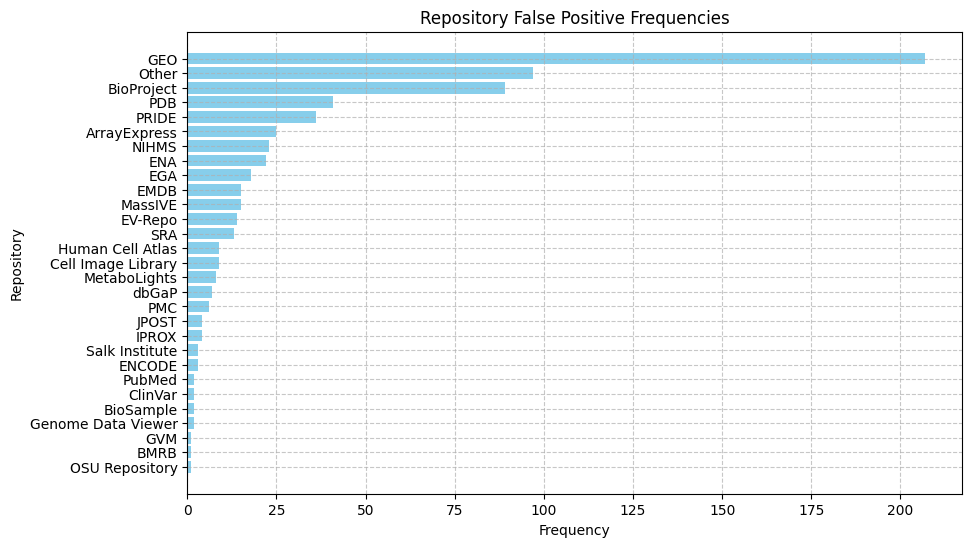

In [4]:
# Convert to DataFrame for display
repo_df = pd.DataFrame(list(repo_counts.items()), columns=['Repository', 'Frequency'])
repo_df.sort_values('Frequency', ascending=False, inplace=True)
# Display directly here# Plotting the frequencies
plt.figure(figsize=(10, 6))
plt.barh(repo_df['Repository'], repo_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Repository')
plt.title('Repository False Positive Frequencies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [5]:
print(repo_df)

            Repository  Frequency
1                  GEO        207
7                Other         97
6           BioProject         89
3                  PDB         41
8                PRIDE         36
9         ArrayExpress         25
13               NIHMS         23
5                  ENA         22
0                  EGA         18
4                 EMDB         15
15             MassIVE         15
19             EV-Repo         14
11                 SRA         13
18    Human Cell Atlas          9
10  Cell Image Library          9
12        MetaboLights          8
24               dbGaP          7
14                 PMC          6
17               JPOST          4
16               IPROX          4
25      Salk Institute          3
28              ENCODE          3
20              PubMed          2
22             ClinVar          2
23           BioSample          2
26  Genome Data Viewer          2
21                 GVM          1
2                 BMRB          1
27      OSU Re